In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

# Network Intrusion Detection System (NIDS)

## UNSW-NB15

Synthetic data from Australian UNSW University

## Explanatory data analysis and data cleaning

- Most common intrusion
- Data handling (Nans, merges, column names)
- More data info

In [2]:
# All Attacks categories

event_list = pd.read_csv('data/UNSW-NB15_LIST_EVENTS.csv')
event_list.tail()


,Attack category,Attack subcategory,Number of events
203,Shellcode,Decoders,18
204,Shellcode,Multiple OS,10
205,Shellcode,Solaris,12
206,Worms,,174
207,NaN,Total,2540044


In [3]:
# We delete normal attacks to see more clearly the rest of attack categories

event_list['Attack category'] = pd.Categorical(event_list['Attack category'])
event_list['Attack category'] = event_list['Attack category'].cat.remove_categories('normal')
event_list['Attack category'] = event_list['Attack category'].cat.remove_categories('Generic')
print(event_list['Attack category'])

0            NaN
1       Fuzzers 
2       Fuzzers 
3       Fuzzers 
4       Fuzzers 
         ...    
203    Shellcode
204    Shellcode
205    Shellcode
206        Worms
207          NaN
Name: Attack category, Length: 208, dtype: category
Categories (11, object): [' Fuzzers', ' Fuzzers ', ' Reconnaissance ', ' Shellcode ', ..., 'Exploits', 'Reconnaissance', 'Shellcode', 'Worms']


In [4]:
# Counting attacks categories

print(event_list['Attack subcategory'].value_counts(),'\n',('-.')*30, event_list['Attack category'].value_counts())

SMTP              5
HTTP              5
TFTP              4
Telnet            4
DNS               4
                 ..
IIS Web Server    1
 SMTP             1
Cisco Skinny      1
Browser           1
Total             1
Name: Attack subcategory, Length: 152, dtype: int64 
 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. Exploits            75
DoS                 46
 Shellcode          15
Shellcode           15
Reconnaissance      14
 Reconnaissance     13
 Fuzzers            10
 Fuzzers             3
Analysis             3
Backdoors            1
Worms                1
Name: Attack category, dtype: int64


In [5]:
event_list['Attack category']

0            NaN
1       Fuzzers 
2       Fuzzers 
3       Fuzzers 
4       Fuzzers 
         ...    
203    Shellcode
204    Shellcode
205    Shellcode
206        Worms
207          NaN
Name: Attack category, Length: 208, dtype: category
Categories (11, object): [' Fuzzers', ' Fuzzers ', ' Reconnaissance ', ' Shellcode ', ..., 'Exploits', 'Reconnaissance', 'Shellcode', 'Worms']

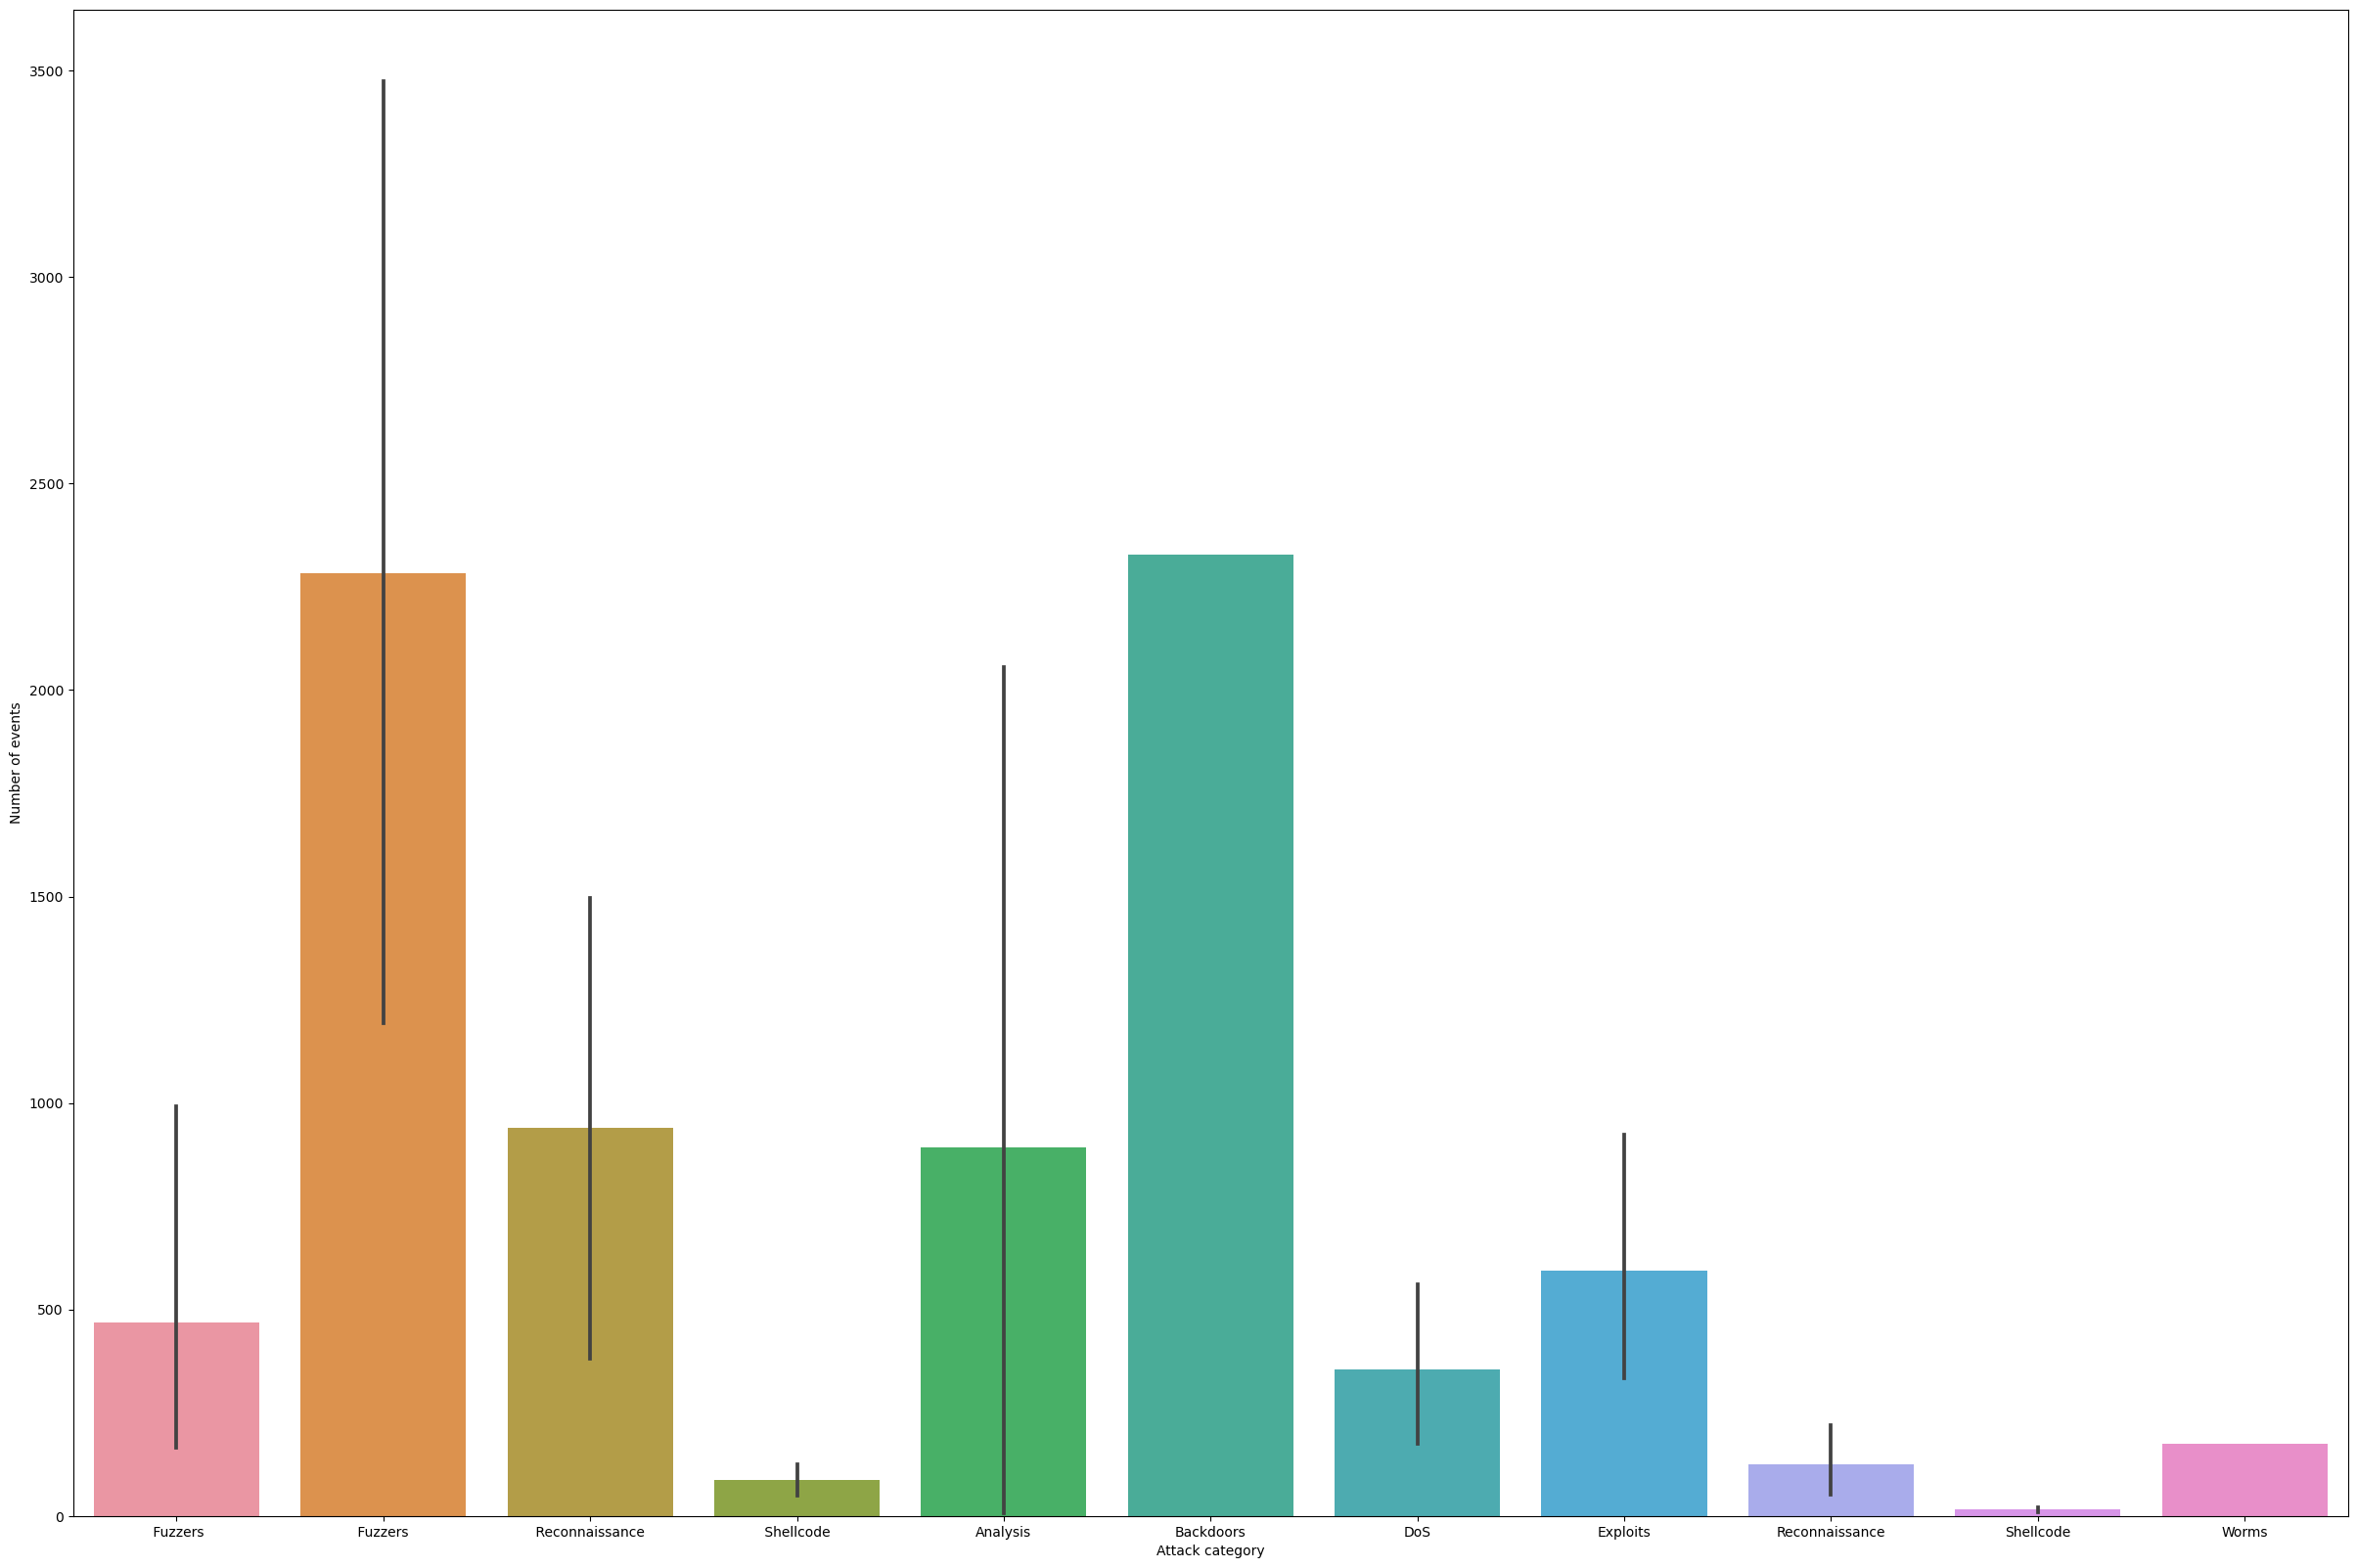

In [6]:
# visualization of the different kind of attacks and its frequency

plt.figure(figsize=(30, 20))
sns.barplot(x=event_list['Attack category'], y=event_list['Number of events']);

In [ ]:
# Loading data
import pandas as pd
dfs = []
for i in range(1,5):
    path = 'data/UNSW-NB15_{}.csv'  # trying to do it in one shot
    dfs.append(pd.read_csv(path.format(i), header = None))
df = pd.concat(dfs).reset_index(drop=True)  # all in one

In [8]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,24465.671880,146610.765600,6,8,255,255,4035116044,222196311,53,229,0,0,1221.136547,30.096029,1424262068,1424262069,17.394400,12.405143,0.000608,0.000468,0.000140,0,0,NaN,NaN,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,29,2,2,ftp,8743.816406,6333.240234,8,6,255,255,1529727621,185369967,57,58,0,0,3961.093354,129.038367,1424262068,1424262069,51.976999,72.915602,0.000609,0.000477,0.000132,0,0,NaN,2.0,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,29,7,9,ftp,2204.839844,2549.582764,32,30,255,255,497208793,889904111,56,70,0,0,13233.728560,379.052750,1424262062,1424262069,204.359814,214.372375,0.000617,0.000485,0.000132,0,0,NaN,2.0,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,29,2,57,http,12496.513670,598375.062500,58,116,255,255,1289728069,3436097151,60,1432,1,79745,2868.893137,1951.035944,1424262067,1424262069,38.609700,19.133826,0.000680,0.000541,0.000139,0,0,2.0,NaN,,1,1,2,4,2,2,2,NaN,0
2540046,175.45.176.0,17293,149.171.126.17,110,tcp,CON,0.942984,574,676,62,252,5,6,pop3,4470.913574,5259.898438,12,12,255,255,3026824982,3748412468,48,56,0,0,3903.523582,95.650531,1424262068,1424262069,79.714089,80.827180,0.139446,0.053884,0.085562,0,3,NaN,NaN,,1,1,2,4,2,2,2,Exploits,1


In [9]:
# naming columns with NUSW-NB15_features.csv

df_col = pd.read_csv('data/NUSW-NB15_features.csv', encoding='ISO-8859-1')# feature names
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
                                            # modifying names for easier work

df.columns = df_col['Name']
df.tail()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,24465.671880,146610.765600,6,8,255,255,4035116044,222196311,53,229,0,0,1221.136547,30.096029,1424262068,1424262069,17.394400,12.405143,0.000608,0.000468,0.000140,0,0,NaN,NaN,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,29,2,2,ftp,8743.816406,6333.240234,8,6,255,255,1529727621,185369967,57,58,0,0,3961.093354,129.038367,1424262068,1424262069,51.976999,72.915602,0.000609,0.000477,0.000132,0,0,NaN,2.0,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,29,7,9,ftp,2204.839844,2549.582764,32,30,255,255,497208793,889904111,56,70,0,0,13233.728560,379.052750,1424262062,1424262069,204.359814,214.372375,0.000617,0.000485,0.000132,0,0,NaN,2.0,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,29,2,57,http,12496.513670,598375.062500,58,116,255,255,1289728069,3436097151,60,1432,1,79745,2868.893137,1951.035944,1424262067,1424262069,38.609700,19.133826,0.000680,0.000541,0.000139,0,0,2.0,NaN,,1,1,2,4,2,2,2,NaN,0
2540046,175.45.176.0,17293,149.171.126.17,110,tcp,CON,0.942984,574,676,62,252,5,6,pop3,4470.913574,5259.898438,12,12,255,255,3026824982,3748412468,48,56,0,0,3903.523582,95.650531,1424262068,1424262069,79.714089,80.827180,0.139446,0.053884,0.085562,0,3,NaN,NaN,,1,1,2,4,2,2,2,Exploits,1


In [10]:
df.isna().sum() # cleaning

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [11]:
# segun el paper los nans en 'attack_cat' son la categoria 'normal'

# According to paper NaNs in 'attack_cat' are 'normal' attack.

df['attack_cat'] = df['attack_cat'].fillna(value='normal').apply(lambda x: x.strip().lower())
df['is_ftp_login'] = df['is_ftp_login'].fillna(value=0)
df['ct_flw_http_mthd'] = df['ct_flw_http_mthd'].fillna(value=0)

In [12]:
df.isna().sum()

Name
srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
sload               0
dload               0
spkts               0
dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
sjit                0
djit                0
stime               0
ltime               0
sintpkt             0
dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_ds

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [14]:
df.describe()

Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,6.587916e-01,4.339600e+03,3.642759e+04,6.278197e+01,3.076681e+01,5.163921e+00,1.632944e+01,3.695645e+07,2.450861e+06,3.328884e+01,4.272664e+01,1.500887e+02,1.497459e+02,1.261701e+09,1.261766e+09,1.242536e+02,2.766719e+02,8.325318e-02,4.242118e+03,1.589037e+03,7.300755e+02,1.423261e+09,1.423261e+09,1.933225e+02,7.882476e+01,6.180475e-03,3.287595e-03,2.892880e-03,1.651544e-03,2.611546e-01,1.100779e-01,1.735125e-02,9.206988e+00,8.988958e+00,6.439103e+00,6.900986e+00,4.642139e+00,3.592729e+00,6.845886e+00,1.264870e-01
std,1.392493e+01,5.640599e+04,1.610960e+05,7.462277e+01,4.285089e+01,2.251707e+01,5.659474e+01,1.186043e+08,4.224863e+06,7.628388e+01,1.215020e+02,1.254824e+02,1.255438e+02,1.422027e+09,1.422139e+09,1.519162e+02,3.356166e+02,3.500045e-01,4.750053e+04,1.691036e+04,3.438558e+03,1.134449e+06,1.134448e+06,2.779163e+03,1.433191e+03,4.615863e-02,2.593570e-02,2.394668e-02,4.060563e-02,6.830974e-01,5.564195e-01,1.334571e-01,1.083676e+01,1.082249e+01,8.162034e+00,8.205062e+00,8.477579e+00,6.174445e+00,1.125828e+01,3.323975e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.421927e+09,1.421927e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353963e+05,1.191594e+04,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,6.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.421952e+09,1.421952e+09,9.000000e-03,6.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,1.200000e+01,2.550000e+02,2.550000e+02,6.397250e+08,6.384172e+08,7.300000e+01,8.900000e+01,0.000000e+00,0.000000e+00,1.912490e+01,2.653561e+00,1.424227e+09,1.424227e+09,4.682620e-01,4.147550e-01,6.130000e-04,4.830000e-04,1.220000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145545e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925974e+06,4.400000e+01,4.200000e+01,2.550000e+02,2.550000e+02,2.467160e+09,2.469411e+09,1.320000e+02,5.650000e+02,0.000000e+00,0.000000e+00,4.137935e+02,6.350857e+01,1.424245e+09,1.424245e+09,7.351427e+00,6.202100e+00,7.020000e-04,5.540000e-04,1.400000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.00000

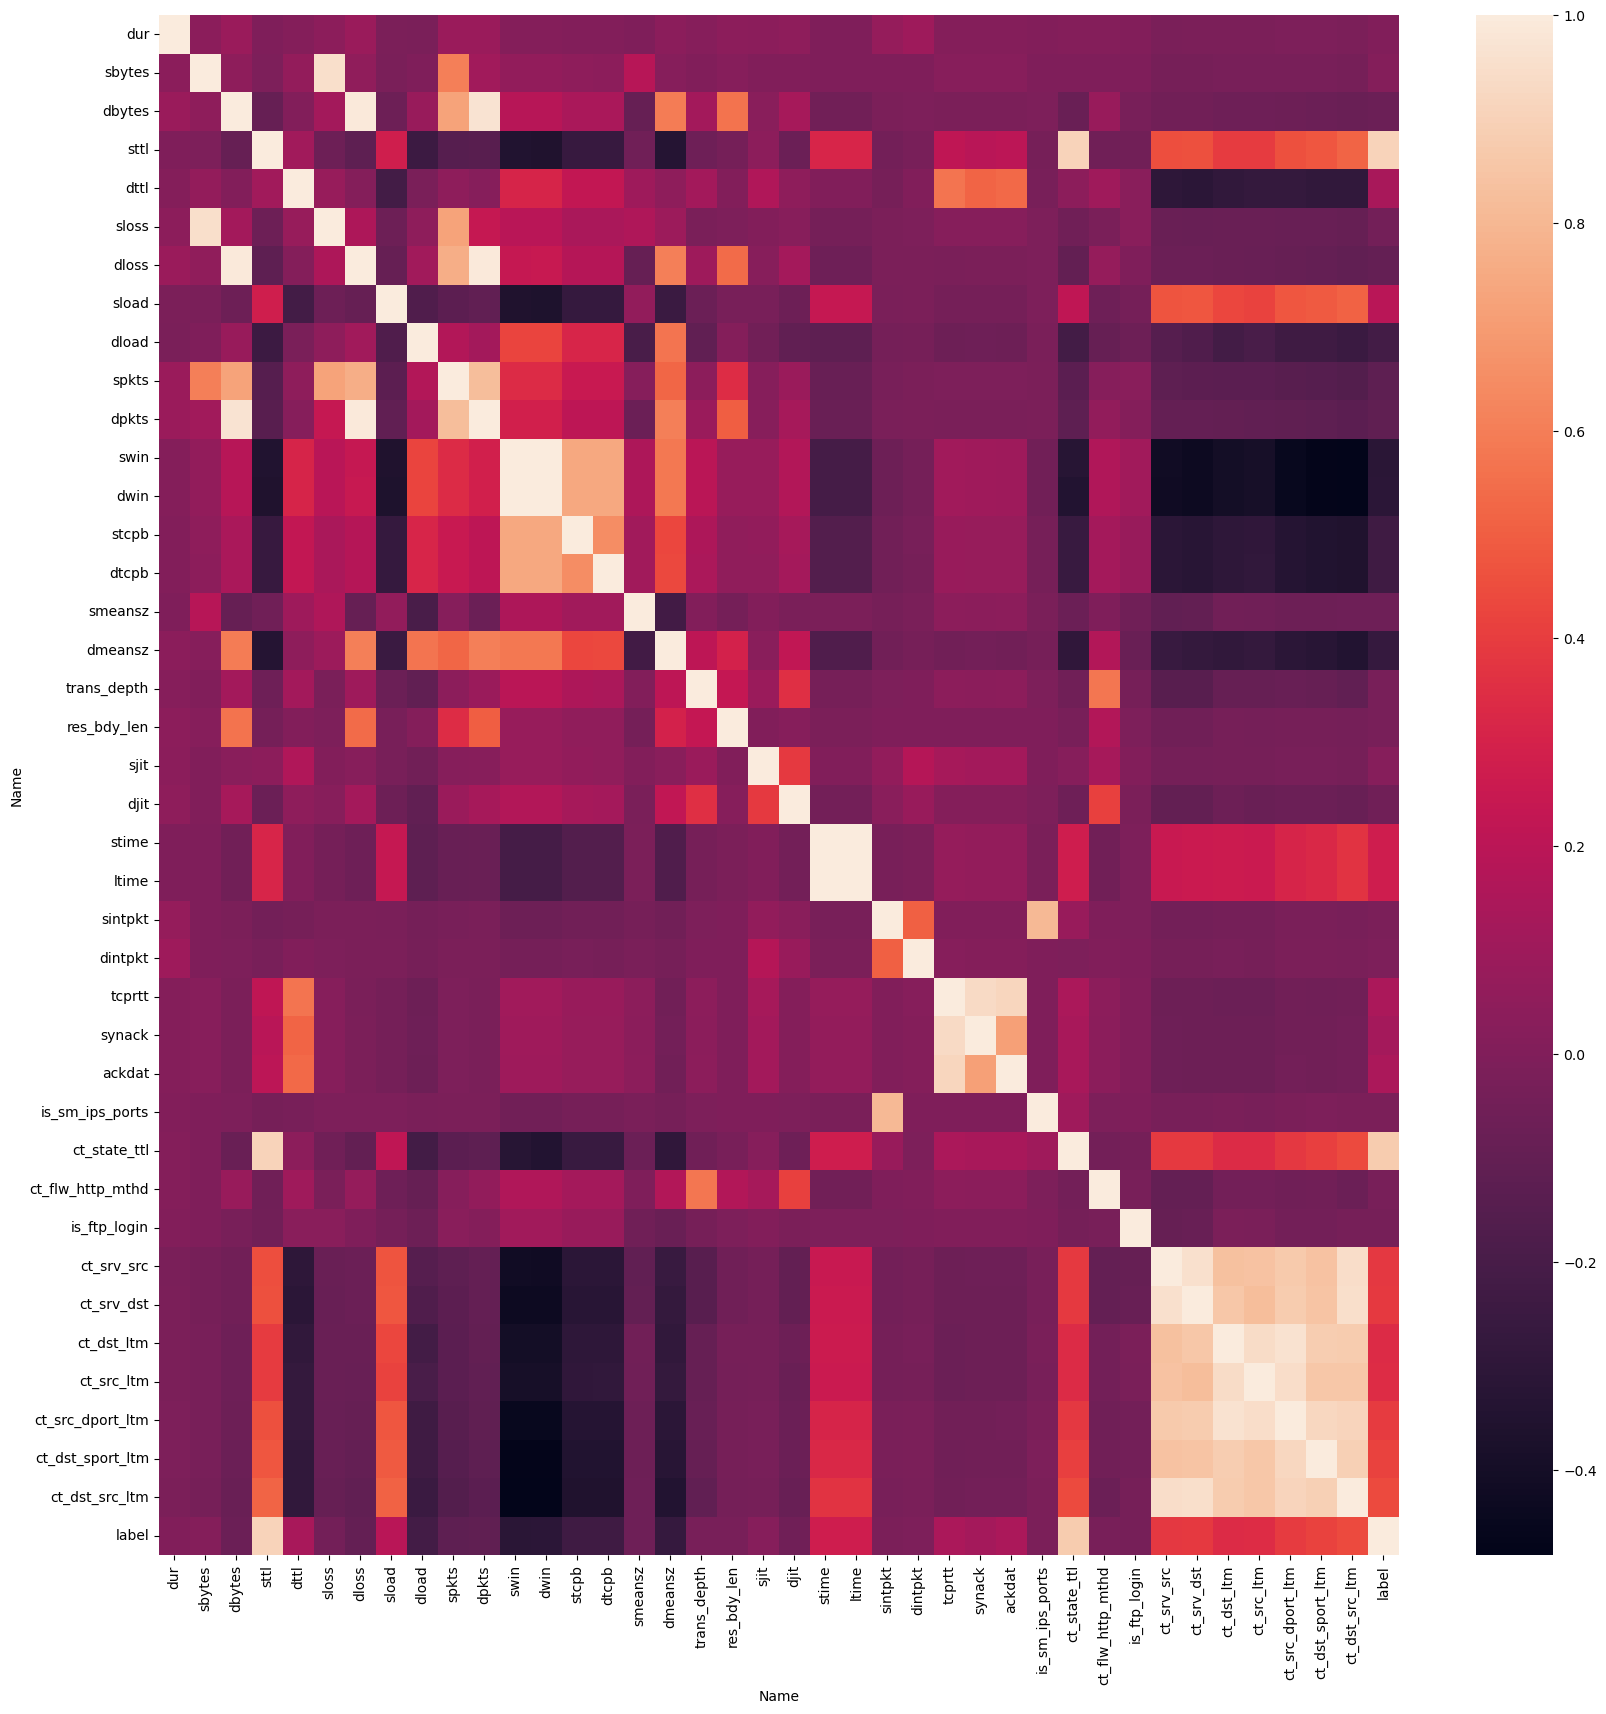

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr());

In [16]:
# df.to_csv('ids_limpio.csv') # three minutes to save